共變異係數矩陣.shape= (13, 13)
共變異係數矩陣= [[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0

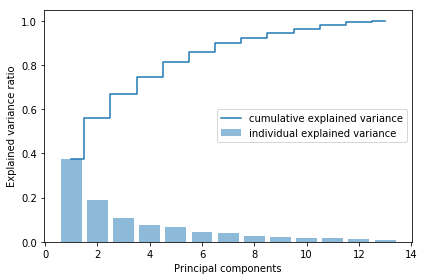

特徵值，特徵向量length： 13
特徵值，特徵向量： [(4.892308303273741, array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])), (2.4663503157592306, array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
        0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
       -0.27924322, -0.174365  ,  0.36315461])), (1.4280997275048442, array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
        0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
        0.09323872,  0.19607741, -0.09731711])), (1.0123346209044954, array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
        0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
        0.02417403,  0.18402864,  0.05676778])), (0.8490645933450257, array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
        0.14064543,  0

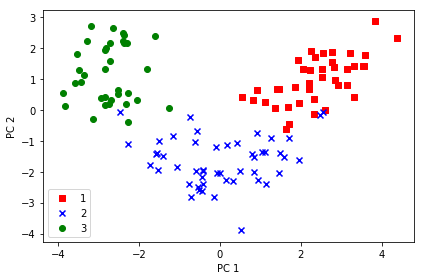

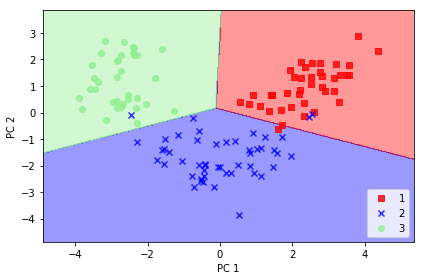

In [3]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import warnings,math
import matplotlib.pyplot as plt
 
##讀取wine 資料+
df_wine = pd.read_csv('winedata.csv',header=None)      
        
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline']
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
##讀取wine 資料-
 
#求共變異係數矩陣
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)
 
#求共變異係數矩陣 的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("特徵向量.shape=",eigen_vecs.shape)
print("特徵向量=",eigen_vecs)
print("特徵值=",eigen_vals)
 
 
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",var_exp)
print("特徵值變異數比率累加：",cum_var_exp)
 
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
 
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
print("特徵值，特徵向量length：",len(eigen_pairs))
print("特徵值，特徵向量：",eigen_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print("特徵值，特徵向量排序：",eigen_pairs.sort(key=lambda k: k[0], reverse=True))
#保留兩個最具影響力的特徵向量組成13x2 的投影矩陣W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)
 
#畫出轉換後的數據集 散點圖
#print("X_train_std[0].dot(w)=",X_train_std[0].dot(w))
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
 
##劃出決策分布圖
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
      
#使用LogisticRegression 並用兩個PCA 主成分做訓練分類 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()





In [12]:
df_wine = pd.read_csv('winedata.csv',header=None)
# print(type(df_wine))
# print(df_wine)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline']
# print(df_wine)

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
print("X")
print(len(X[0]))
print(X)

print("Y")
print(len(y))
print(y)
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=0)

X
13
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Y
178
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [13]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train")
print(X_train)


In [17]:
print(X_train_std)
print(X_test_std)

[[-0.1580111   1.01565691  0.95872146 ...  0.83567052 -0.68335232
  -1.57216448]
 [ 0.14514505  1.1483038   1.44959484 ...  1.18697721  0.68709641
  -0.38044571]
 [-0.1813308   1.06287801  1.63099912 ...  0.99874165  1.30689704
   1.35276026]
 ...
 [ 0.14514505 -0.27381356 -0.61084106 ... -0.25318278  0.14066266
  -0.21424584]
 [ 0.49494061  0.13258933  0.08425824 ...  0.67623657  0.45893617
  -0.15096116]
 [ 0.49494061 -0.20201616 -0.67027435 ... -0.66846992 -0.28466404
   0.37458056]]
[[-0.08461254 -1.55117698 -1.90203546 ... -1.8026607  -1.31155505
  -0.88032342]
 [ 0.37086558  0.13168869  0.85463484 ...  1.23857528  0.92974208
   0.02089763]
 [ 0.4391873  -1.55117698 -0.59048799 ... -1.45397198 -0.2840224
   0.57762373]
 ...
 [ 0.14312652  0.28845199  0.32533124 ...  0.91697993  1.21387575
   1.31274559]
 [-0.08461254 -0.70402011 -0.63258018 ... -0.0300089   0.16970501
  -0.34814794]
 [ 0.46196121  0.24020682 -0.89037208 ... -1.41992897 -1.519589
  -0.84486381]]


In [25]:
print(type(eigen_vals))
for index in eigen_vals:
    print(index)

<class 'numpy.ndarray'>
(41.61212765420818+0j)
<class 'numpy.complex128'>
(10.733009246296545+0j)
<class 'numpy.complex128'>
(4.1214414710720915+0j)
<class 'numpy.complex128'>
(2.731648492677193+0j)
<class 'numpy.complex128'>
(1.4780589431377553+0j)
<class 'numpy.complex128'>
(0.826720576234897+0j)
<class 'numpy.complex128'>
(0.6366159293429202+0j)
<class 'numpy.complex128'>
(0.4249838414857686+0j)
<class 'numpy.complex128'>
(0.2704727002130633+0j)
<class 'numpy.complex128'>
(0.20611207608583826+0j)
<class 'numpy.complex128'>
(0.1962657963971869+0j)
<class 'numpy.complex128'>
(0.13081136320063455+0j)
<class 'numpy.complex128'>
(0.12482156348402126+0j)
<class 'numpy.complex128'>
(0.10525565156630969+0j)
<class 'numpy.complex128'>
(0.10076939250304534+0j)
<class 'numpy.complex128'>
(0.08923951623069672+0j)
<class 'numpy.complex128'>
(0.06484474308616503+0j)
<class 'numpy.complex128'>
(0.053012203705092555+0j)
<class 'numpy.complex128'>
(0.043289412942709764+0j)
<class 'numpy.complex128'>

# TRY 0050 PCA

共變異係數矩陣.shape= (64, 64)
共變異係數矩陣= [[ 1.00156986  0.391408    0.249563   ...  0.26612088  0.00476248
  -0.05176319]
 [ 0.391408    1.00156986  0.63327164 ...  0.54499722  0.09913843
  -0.01111593]
 [ 0.249563    0.63327164  1.00156986 ...  0.74626791  0.37485642
   0.10812535]
 ...
 [ 0.26612088  0.54499722  0.74626791 ...  1.00156986  0.76638679
   0.50647935]
 [ 0.00476248  0.09913843  0.37485642 ...  0.76638679  1.00156986
   0.86989691]
 [-0.05176319 -0.01111593  0.10812535 ...  0.50647935  0.86989691
   1.00156986]]
特徵向量.shape= (64, 64)
特徵向量= [[ 4.06194034e-03+0.j  6.99014076e-02+0.j -1.98983856e-01+0.j ...
   5.95672883e-11+0.j -2.16324340e-11+0.j -5.51873105e-11+0.j]
 [-2.32391973e-03+0.j  1.62281112e-01+0.j -3.01148474e-01+0.j ...
  -8.42451313e-11+0.j  8.37691451e-10+0.j  8.26768966e-10+0.j]
 [-1.23077309e-02+0.j  2.41998011e-01+0.j -2.24536552e-01+0.j ...
   1.84515816e-10+0.j  2.73702304e-10+0.j  8.47036878e-10+0.j]
 ...
 [-2.04058109e-02+0.j  2.80217427e-01+0.j -4.97239929e-0

C:\Users\Big data\Anaconda3\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\Big data\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


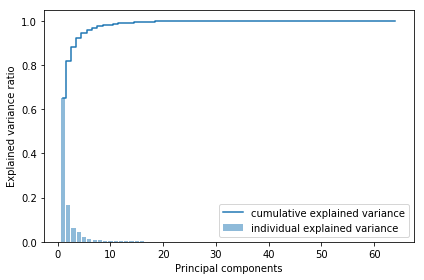

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import warnings,math
import matplotlib.pyplot as plt
 
##讀取wine 資料+
df_wine = pd.read_csv('0050_new.csv',header=None)      
df_wine.columns =["y","Close-Open","close-rsi %3","close-rsi %7","close-rsi %12","close-rsi %26","close-rsi %60","close-rsi %90","close-rsi %120","close-rsi %180","close-rsi %240","close-rsi %300","close-ma3","close-ma7","close-ma12","close-ma26","close-ma60","close-ma90","close-ma120","close-ma180","close-ma240","close-ma300","close-wma3","close-wma7","close-wma12","close-wma26","close-wma60","close-wma90","close-wma120","close-wma180","close-wma240","close-wma300","close-es0.0","close-es0.05","close-es0.1","close-es0.15","close-es0.2","close-es0.25","close-es0.3","close-es0.35","close-es0.4","close-es0.45","close-es0.5","close-es0.55","close-es0.6","close-es0.65","close-es0.7","close-es0.75","close-es0.8","close-es0.85","close-es0.9","close-es0.95","di","%K-4","%D-4","slow %D-4","%K-6","%D-6","slow %D-6","%K-8","%D-8","slow %D-8","%K-10","%D-10","slow %D-10"]
    
# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#        'Alcalinity of ash', 'Magnesium', 'Total phenols',
#        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#        'Proline']
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
##讀取wine 資料-
 
#求共變異係數矩陣
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)
 
#求共變異係數矩陣 的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("特徵向量.shape=",eigen_vecs.shape)
print("特徵向量=",eigen_vecs)
print("特徵值=",eigen_vals)
 
 
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",var_exp)
print("特徵值變異數比率累加：",cum_var_exp)
 
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 65), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 65), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
 
# # Make a list of (eigenvalue, eigenvector) tuples
# eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
#                for i in range(len(eigen_vals))]
# print("特徵值，特徵向量length：",len(eigen_pairs))
# print("特徵值，特徵向量：",eigen_pairs)
# # Sort the (eigenvalue, eigenvector) tuples from high to low
# eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# print("特徵值，特徵向量排序：",eigen_pairs.sort(key=lambda k: k[0], reverse=True))
# #保留兩個最具影響力的特徵向量組成13x2 的投影矩陣W
# w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
#                eigen_pairs[1][1][:, np.newaxis]))
# print('Matrix W:\n', w)
 
# #畫出轉換後的數據集 散點圖
# #print("X_train_std[0].dot(w)=",X_train_std[0].dot(w))
# X_train_pca = X_train_std.dot(w)
# colors = ['r', 'b', 'g']
# markers = ['s', 'x', 'o']
# for l, c, m in zip(np.unique(y_train), colors, markers):
#     plt.scatter(X_train_pca[y_train == l, 0], 
#                 X_train_pca[y_train == l, 1], 
#                 c=c, label=l, marker=m)
 
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()
 
# ##劃出決策分布圖
# from matplotlib.colors import ListedColormap
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     # setup marker generator and color map
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
#     # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())
#     # plot class samples
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#                     alpha=0.8, c=cmap(idx),
#                     marker=markers[idx], label=cl)
      
# #使用LogisticRegression 並用兩個PCA 主成分做訓練分類 
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr = lr.fit(X_train_pca, y_train)
# plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()





In [28]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

In [39]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[ 4.16121277e+01+0.00000000e+00j  1.07330092e+01+0.00000000e+00j
  4.12144147e+00+0.00000000e+00j  2.73164849e+00+0.00000000e+00j
  1.47805894e+00+0.00000000e+00j  8.26720576e-01+0.00000000e+00j
  6.36615929e-01+0.00000000e+00j  4.24983841e-01+0.00000000e+00j
  2.70472700e-01+0.00000000e+00j  2.06112076e-01+0.00000000e+00j
  1.96265796e-01+0.00000000e+00j  1.30811363e-01+0.00000000e+00j
  1.24821563e-01+0.00000000e+00j  1.05255652e-01+0.00000000e+00j
  1.00769393e-01+0.00000000e+00j  8.92395162e-02+0.00000000e+00j
  6.48447431e-02+0.00000000e+00j  5.30122037e-02+0.00000000e+00j
  4.32894129e-02+0.00000000e+00j  3.83208620e-02+0.00000000e+00j
  3.47728655e-02+0.00000000e+00j  2.41479740e-02+0.00000000e+00j
  1.30532700e-02+0.00000000e+00j  1.19719895e-02+0.00000000e+00j
  1.09856271e-02+0.00000000e+00j  8.08832561e-03+0.00000000e+00j
  3.84396445e-03+0.00000000e+00j  1.86474816e-03+0.00000000e+00j
  1.09324312e-03+0.00000000e+00j  9.64687512e-04+0.00000000e+00j
  9.13128577e-04+0.000000

In [42]:
result=[]
df_columns =["Close-Open","close-rsi %3","close-rsi %7","close-rsi %12","close-rsi %26","close-rsi %60","close-rsi %90","close-rsi %120","close-rsi %180","close-rsi %240","close-rsi %300","close-ma3","close-ma7","close-ma12","close-ma26","close-ma60","close-ma90","close-ma120","close-ma180","close-ma240","close-ma300","close-wma3","close-wma7","close-wma12","close-wma26","close-wma60","close-wma90","close-wma120","close-wma180","close-wma240","close-wma300","close-es0.0","close-es0.05","close-es0.1","close-es0.15","close-es0.2","close-es0.25","close-es0.3","close-es0.35","close-es0.4","close-es0.45","close-es0.5","close-es0.55","close-es0.6","close-es0.65","close-es0.7","close-es0.75","close-es0.8","close-es0.85","close-es0.9","close-es0.95","di","%K-4","%D-4","slow %D-4","%K-6","%D-6","slow %D-6","%K-8","%D-8","slow %D-8","%K-10","%D-10","slow %D-10"]
for index in range(len(eigen_vals)):
    result.append([df_columns[index],eigen_vals[index]])
print(result)

[['Close-Open', (41.61212765420818+0j)], ['close-rsi %3', (10.733009246296545+0j)], ['close-rsi %7', (4.1214414710720915+0j)], ['close-rsi %12', (2.731648492677193+0j)], ['close-rsi %26', (1.4780589431377553+0j)], ['close-rsi %60', (0.826720576234897+0j)], ['close-rsi %90', (0.6366159293429202+0j)], ['close-rsi %120', (0.4249838414857686+0j)], ['close-rsi %180', (0.2704727002130633+0j)], ['close-rsi %240', (0.20611207608583826+0j)], ['close-rsi %300', (0.1962657963971869+0j)], ['close-ma3', (0.13081136320063455+0j)], ['close-ma7', (0.12482156348402126+0j)], ['close-ma12', (0.10525565156630969+0j)], ['close-ma26', (0.10076939250304534+0j)], ['close-ma60', (0.08923951623069672+0j)], ['close-ma90', (0.06484474308616503+0j)], ['close-ma120', (0.053012203705092555+0j)], ['close-ma180', (0.043289412942709764+0j)], ['close-ma240', (0.03832086203035413+0j)], ['close-ma300', (0.0347728655433916+0j)], ['close-wma3', (0.02414797398195117+0j)], ['close-wma7', (0.013053269960696785+0j)], ['close-wm

In [45]:
type(result)

list

In [48]:
sorted(result, key = lambda x : x[1],reverse=True)

[['Close-Open', (41.61212765420818+0j)],
 ['close-rsi %3', (10.733009246296545+0j)],
 ['close-rsi %7', (4.1214414710720915+0j)],
 ['close-rsi %12', (2.731648492677193+0j)],
 ['close-rsi %26', (1.4780589431377553+0j)],
 ['close-rsi %60', (0.826720576234897+0j)],
 ['close-rsi %90', (0.6366159293429202+0j)],
 ['close-rsi %120', (0.4249838414857686+0j)],
 ['close-rsi %180', (0.2704727002130633+0j)],
 ['close-rsi %240', (0.20611207608583826+0j)],
 ['close-rsi %300', (0.1962657963971869+0j)],
 ['close-ma3', (0.13081136320063455+0j)],
 ['close-ma7', (0.12482156348402126+0j)],
 ['close-ma12', (0.10525565156630969+0j)],
 ['close-ma26', (0.10076939250304534+0j)],
 ['close-ma60', (0.08923951623069672+0j)],
 ['close-ma90', (0.06484474308616503+0j)],
 ['close-ma120', (0.053012203705092555+0j)],
 ['close-ma180', (0.043289412942709764+0j)],
 ['close-ma240', (0.03832086203035413+0j)],
 ['close-ma300', (0.0347728655433916+0j)],
 ['close-wma3', (0.02414797398195117+0j)],
 ['close-wma7', (0.0130532699606

共變異係數矩陣.shape= (29, 29)
共變異係數矩陣= [[ 1.00143266e+00  5.97902028e-02  3.15239289e-01 -5.63938069e-01
   8.79482650e-01  2.18182402e-01 -3.84103906e-01 -3.79948273e-01
   8.72971416e-01  4.22244683e-02 -1.49777939e-02 -1.74131944e-01
   4.23273621e-02  3.97378316e-02  4.74283103e-02 -5.97689661e-01
   4.18075604e-01 -7.37228087e-02 -1.68440979e-01 -8.54765310e-01
   2.79024494e-02 -1.69624965e-01  4.55838524e-01 -3.70034305e-01
   3.94071027e-02  2.33897338e-01  5.95099743e-01  2.21533179e-01
  -1.32286791e-01]
 [ 5.97902028e-02  1.00143266e+00 -2.73039490e-01 -2.87772029e-01
   8.79564469e-02 -1.37611679e-01 -4.02599104e-03  1.40083296e-02
   8.68544004e-02  9.76949290e-01 -7.64994592e-01 -7.99752713e-03
   9.68960902e-01  9.49981970e-01  9.37365515e-01 -3.63433451e-01
  -3.88543120e-01 -1.32202837e-01 -9.00802919e-01 -4.40631110e-03
   4.39920545e-01 -9.00601459e-01 -2.81321093e-01 -2.66631962e-01
   4.96911059e-02  4.07253571e-02 -2.39047916e-02  4.77335490e-01
  -3.82116989e-01]
 [ 3.

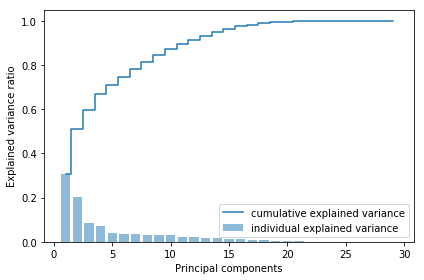

In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import warnings,math
import matplotlib.pyplot as plt
 
##讀取wine 資料+
df_wine = pd.read_csv('2330info.csv',header=None)      
df_wine.columns =["NDClose","MainBS","MainHold","MainB","MainS","FIBS","SITBS","DBS","Bhedge","IIBS","FIHold","SITHold","Dhold","IIHold","FIHoldRate","IIHoldRate","FinB","FinS","FinReturn","FinBal","FinChange","Restriction","FinUseRate","MTSS","MTSB","MTSReturn","MTSBal","MTSChange","FinMTSRate","Fin-MTS"]

# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#        'Alcalinity of ash', 'Magnesium', 'Total phenols',
#        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#        'Proline']
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
##讀取wine 資料-
 
#求共變異係數矩陣
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)
 
#求共變異係數矩陣 的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("特徵向量.shape=",eigen_vecs.shape)
print("特徵向量=",eigen_vecs)
print("特徵值=",eigen_vals)
 
 
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",var_exp)
print("特徵值變異數比率累加：",cum_var_exp)
 
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 30), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 30), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
 
# # Make a list of (eigenvalue, eigenvector) tuples
# eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
#                for i in range(len(eigen_vals))]
# print("特徵值，特徵向量length：",len(eigen_pairs))
# print("特徵值，特徵向量：",eigen_pairs)
# # Sort the (eigenvalue, eigenvector) tuples from high to low
# eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# print("特徵值，特徵向量排序：",eigen_pairs.sort(key=lambda k: k[0], reverse=True))
# #保留兩個最具影響力的特徵向量組成13x2 的投影矩陣W
# w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
#                eigen_pairs[1][1][:, np.newaxis]))
# print('Matrix W:\n', w)
 
# #畫出轉換後的數據集 散點圖
# #print("X_train_std[0].dot(w)=",X_train_std[0].dot(w))
# X_train_pca = X_train_std.dot(w)
# colors = ['r', 'b', 'g']
# markers = ['s', 'x', 'o']
# for l, c, m in zip(np.unique(y_train), colors, markers):
#     plt.scatter(X_train_pca[y_train == l, 0], 
#                 X_train_pca[y_train == l, 1], 
#                 c=c, label=l, marker=m)
 
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()
 
# ##劃出決策分布圖
# from matplotlib.colors import ListedColormap
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     # setup marker generator and color map
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
#     # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())
#     # plot class samples
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#                     alpha=0.8, c=cmap(idx),
#                     marker=markers[idx], label=cl)
      
# #使用LogisticRegression 並用兩個PCA 主成分做訓練分類 
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr = lr.fit(X_train_pca, y_train)
# plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()





In [16]:
result=[]
df_columns =["MainBS","MainHold","MainB","MainS","FIBS","SITBS","DBS","Bhedge","IIBS","FIHold","SITHold","Dhold","IIHold","FIHoldRate","IIHoldRate","FinB","FinS","FinReturn","FinBal","FinChange","Restriction","FinUseRate","MTSS","MTSB","MTSReturn","MTSBal","MTSChange","FinMTSRate","Fin-MTS"]


for index in range(len(eigen_vals)):
    result.append([df_columns[index],eigen_vals[index]])
print(result)

[['MainBS', 8.912062405995623], ['MainHold', 5.9257930300035095], ['MainB', 2.4699306481029075], ['MainS', 2.1403132676846868], ['FIBS', 1.1734406710975986], ['SITBS', 1.071761126290547], ['DBS', 1.0111952288398258], ['Bhedge', 0.944136656268606], ['IIBS', 0.8792904788570282], ['FIHold', 0.8600867830596527], ['SITHold', 0.602333444699849], ['Dhold', 0.580731669499531], ['IIHold', 0.515939286643727], ['FIHoldRate', 0.4816075516819005], ['IIHoldRate', 0.42023340826959343], ['FinB', 0.32928876753177017], ['FinS', 0.24688970631793866], ['FinReturn', 0.1911676270834595], ['FinBal', 0.11327147713413917], ['FinChange', 0.07971878206684899], ['Restriction', 0.04889093280635163], ['FinUseRate', 0.031592086015503236], ['MTSS', 0.01093062127193011], ['MTSB', 0.0006598262447485187], ['MTSReturn', 0.0002813869604617451], ['MTSBal', 4.075092025606567e-07], ['MTSChange', 7.449311946018799e-17], ['FinMTSRate', -9.391764284976247e-16], ['Fin-MTS', -1.2204235831257902e-16]]


In [14]:
sorted(result, key = lambda x : x[1],reverse=True)

[['MainBS', 8.912062405995623],
 ['MainHold', 5.9257930300035095],
 ['MainB', 2.4699306481029075],
 ['MainS', 2.1403132676846868],
 ['FIBS', 1.1734406710975986],
 ['SITBS', 1.071761126290547],
 ['DBS', 1.0111952288398258],
 ['Bhedge', 0.944136656268606],
 ['IIBS', 0.8792904788570282],
 ['FIHold', 0.8600867830596527],
 ['SITHold', 0.602333444699849],
 ['Dhold', 0.580731669499531],
 ['IIHold', 0.515939286643727],
 ['FIHoldRate', 0.4816075516819005],
 ['IIHoldRate', 0.42023340826959343],
 ['FinB', 0.32928876753177017],
 ['FinS', 0.24688970631793866],
 ['FinReturn', 0.1911676270834595],
 ['FinBal', 0.11327147713413917],
 ['FinChange', 0.07971878206684899],
 ['Restriction', 0.04889093280635163],
 ['FinUseRate', 0.031592086015503236],
 ['MTSS', 0.01093062127193011],
 ['MTSB', 0.0006598262447485187],
 ['MTSReturn', 0.0002813869604617451],
 ['MTSBal', 4.075092025606567e-07],
 ['MTSChange', 7.449311946018799e-17],
 ['Fin-MTS', -1.2204235831257902e-16],
 ['FinMTSRate', -9.391764284976247e-16]]

共變異係數矩陣.shape= (64, 64)
共變異係數矩陣= [[ 1.00156986  0.391408    0.249563   ...  0.26612088  0.00476248
  -0.05176319]
 [ 0.391408    1.00156986  0.63327164 ...  0.54499722  0.09913843
  -0.01111593]
 [ 0.249563    0.63327164  1.00156986 ...  0.74626791  0.37485642
   0.10812535]
 ...
 [ 0.26612088  0.54499722  0.74626791 ...  1.00156986  0.76638679
   0.50647935]
 [ 0.00476248  0.09913843  0.37485642 ...  0.76638679  1.00156986
   0.86989691]
 [-0.05176319 -0.01111593  0.10812535 ...  0.50647935  0.86989691
   1.00156986]]
特徵向量.shape= (64, 64)
特徵向量= [[ 4.06194034e-03+0.j  6.99014076e-02+0.j -1.98983856e-01+0.j ...
   5.95672883e-11+0.j -2.16324340e-11+0.j -5.51873105e-11+0.j]
 [-2.32391973e-03+0.j  1.62281112e-01+0.j -3.01148474e-01+0.j ...
  -8.42451313e-11+0.j  8.37691451e-10+0.j  8.26768966e-10+0.j]
 [-1.23077309e-02+0.j  2.41998011e-01+0.j -2.24536552e-01+0.j ...
   1.84515816e-10+0.j  2.73702304e-10+0.j  8.47036878e-10+0.j]
 ...
 [-2.04058109e-02+0.j  2.80217427e-01+0.j -4.97239929e-0

C:\Users\Big data\Anaconda3\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\Big data\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


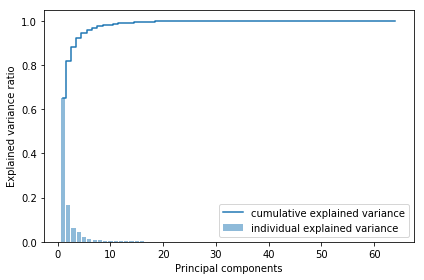

特徵值，特徵向量length： 64
特徵值，特徵向量： [(41.61212765420818, array([ 0.00406194+0.j, -0.00232392+0.j, -0.01230773+0.j, -0.02026559+0.j,
       -0.02520594+0.j, -0.03698583+0.j, -0.05202239+0.j, -0.06591617+0.j,
       -0.088214  +0.j, -0.09614284+0.j, -0.09907978+0.j, -0.1549556 +0.j,
       -0.15494177+0.j, -0.15472121+0.j, -0.1539179 +0.j, -0.1524639 +0.j,
       -0.15110932+0.j, -0.14946136+0.j, -0.14582403+0.j, -0.14222434+0.j,
       -0.13832049+0.j, -0.15492454+0.j, -0.15500295+0.j, -0.15494382+0.j,
       -0.15453911+0.j, -0.15359342+0.j, -0.15284885+0.j, -0.15202037+0.j,
       -0.1500747 +0.j, -0.14809413+0.j, -0.14604264+0.j, -0.15488188+0.j,
       -0.15489419+0.j, -0.15490591+0.j, -0.15491712+0.j, -0.15492786+0.j,
       -0.15493816+0.j, -0.15494797+0.j, -0.15495724+0.j, -0.15496581+0.j,
       -0.15497343+0.j, -0.15497969+0.j, -0.15498391+0.j, -0.15498497+0.j,
       -0.15498104+0.j, -0.15496886+0.j, -0.15494249+0.j, -0.15489005+0.j,
       -0.15478518+0.j, -0.1545575 +0.j, -0.153893

In [36]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import warnings,math
import matplotlib.pyplot as plt
 
##讀取wine 資料+
df_wine = pd.read_csv('0050_new.csv',header=None)      
df_wine.columns =["y","Close-Open","close-rsi %3","close-rsi %7","close-rsi %12","close-rsi %26","close-rsi %60","close-rsi %90","close-rsi %120","close-rsi %180","close-rsi %240","close-rsi %300","close-ma3","close-ma7","close-ma12","close-ma26","close-ma60","close-ma90","close-ma120","close-ma180","close-ma240","close-ma300","close-wma3","close-wma7","close-wma12","close-wma26","close-wma60","close-wma90","close-wma120","close-wma180","close-wma240","close-wma300","close-es0.0","close-es0.05","close-es0.1","close-es0.15","close-es0.2","close-es0.25","close-es0.3","close-es0.35","close-es0.4","close-es0.45","close-es0.5","close-es0.55","close-es0.6","close-es0.65","close-es0.7","close-es0.75","close-es0.8","close-es0.85","close-es0.9","close-es0.95","di","%K-4","%D-4","slow %D-4","%K-6","%D-6","slow %D-6","%K-8","%D-8","slow %D-8","%K-10","%D-10","slow %D-10"]
    
# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#        'Alcalinity of ash', 'Magnesium', 'Total phenols',
#        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#        'Proline']
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #0:d為 class  1:之後為13個特徵行
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
##讀取wine 資料-
 
#求共變異係數矩陣
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)
 
#求共變異係數矩陣 的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("特徵向量.shape=",eigen_vecs.shape)
print("特徵向量=",eigen_vecs)
print("特徵值=",eigen_vals)
 
 
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",var_exp)
print("特徵值變異數比率累加：",cum_var_exp)
 
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 65), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 65), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
 
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
print("特徵值，特徵向量length：",len(eigen_pairs))
print("特徵值，特徵向量：",eigen_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print("特徵值，特徵向量排序：",eigen_pairs.sort(key=lambda k: k[0], reverse=True))
#保留兩個最具影響力的特徵向量組成13x2 的投影矩陣W
#NEW_Matrix=[13xx*64] * [64*7](w)=[13xx*7] 
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis],
               eigen_pairs[5][1][:, np.newaxis],
               eigen_pairs[6][1][:, np.newaxis]))
print('Matrix W:\n', w)
 
#畫出轉換後的數據集 散點圖
#print("X_train_std[0].dot(w)=",X_train_std[0].dot(w))
X_train_pca = X_train_std.dot(w)
# colors = ['r', 'b', 'g','a','b','c','d']
# markers = ['s', 'x', 'o','aa','bb','cc','dd']
# for l, cc, m in zip(np.unique(y_train), colors, markers):
#     plt.scatter(X_train_pca[y_train == l, 0], 
#                 X_train_pca[y_train == l, 1],X_train_pca[y_train == l, 2],c=cc, label=l, marker=m)
 
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()
 
# ##劃出決策分布圖
# from matplotlib.colors import ListedColormap
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     # setup marker generator and color map
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
#     # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())
#     # plot class samples
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#                     alpha=0.8, c=cmap(idx),
#                     marker=markers[idx], label=cl)
      
# #使用LogisticRegression 並用兩個PCA 主成分做訓練分類 
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr = lr.fit(X_train_pca, y_train)
# plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()





In [24]:
#使用LogisticRegression 並用兩個PCA 主成分做訓練分類 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

7

In [37]:
# use new x to try mutipale regression
import numpy as np
from sklearn.linear_model import LinearRegression

# tem=np.array([29,28,34,31,25,29,32,31,24,33,25,31,26,30])
# tem_1=np.array([[29,28,34,31,25,29,32,31,24,33,25,31,26,30],[29,28,34,31,25,29,32,31,24,33,25,31,26,30]])
# teasales=np.array([77,62,93,84,59,64,80,75,58,91,51,73,65,84])
# print(tem)
# print(teasales)

# #轉換維度
# tem=np.reshapee(tem,(len(tm),1))#1*12->12*1 第一個放要轉的array，第二個為要轉成什麼
# teasales=np.reshape(teasales,(len(teasales),1))

# #tem_1=np.reshape(tem_1,(len(tem_1[1]),2),order="C")#1*12->12*1 第一個放要轉的array，第二個為要轉成什麼
# tem_1=tem_1.T


#print(tem_1)
# print(teasales)

lm=LinearRegression()
lm.fit(X_train_pca,y_train)

#模型績效
mse=np.mean((lm.predict(X_train_pca)-y_train)**2)
R_squared=lm.score(X_train_pca,y_train)

print(mse)
print(R_squared)

(0.4173997855491781+0j)
0.994891083916585


C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
C:\Users\Big data\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims)


In [26]:
X_train_pca

array([[ 5.17450415e+00+0.j,  1.95123607e+00+0.j, -2.51686793e+00+0.j,
        ...,  1.39593920e+00+0.j, -1.17198734e+00+0.j,
         1.12581329e+00+0.j],
       [ 3.49638747e+00+0.j,  5.81595080e+00+0.j,  4.10689606e-02+0.j,
        ...,  1.36046258e+00+0.j, -1.18083816e+00+0.j,
        -2.86862457e-01+0.j],
       [ 4.11371740e+00+0.j,  7.44092179e+00+0.j,  2.18228168e+00+0.j,
        ...,  8.07110607e-01+0.j,  2.99062082e-01+0.j,
         9.02218191e-02+0.j],
       ...,
       [-1.56838220e+00+0.j, -1.72193630e+00+0.j,  1.05717232e+00+0.j,
        ..., -5.61794244e-01+0.j, -1.12377262e+00+0.j,
         2.58744688e-01+0.j],
       [-5.32501985e-01+0.j,  1.94718941e+00+0.j,  5.78387997e-01+0.j,
        ...,  1.15090246e-01+0.j, -2.67456118e-01+0.j,
        -1.50357406e+00+0.j],
       [-3.54049184e+00+0.j, -2.53141953e+00+0.j,  4.55271007e-01+0.j,
        ..., -1.75624629e+00+0.j,  6.83071815e-03+0.j,
         1.61755681e-01+0.j]])

In [28]:
len(X_train_pca[0])

7